<a href="https://colab.research.google.com/github/lacarthur/Mushrooms/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Imputation

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/datasets/mushrooms/train.csv', index_col='id')
df = df.dropna(subset='class')
categorical_predictors = [col for col in df.drop('class', axis=1).columns if df[col].dtype == 'object']
numerical_predictors = [col for col in df.drop('class', axis=1).columns if df[col].dtype != 'object']
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


[]

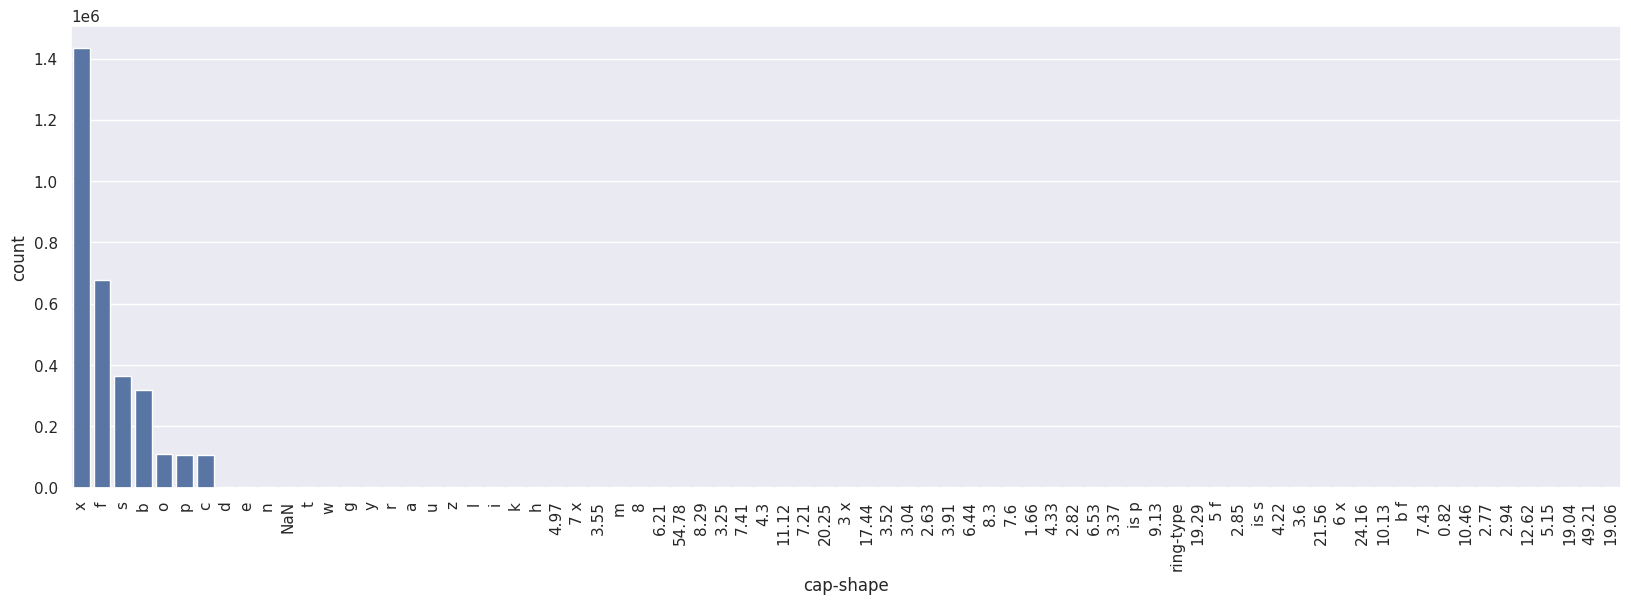

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

cap_shape_data = df['cap-shape'].fillna('NaN').value_counts().reset_index(name='count')
sns.set_theme()
sns.barplot(x='cap-shape', y='count', data=cap_shape_data)
plt.xticks(rotation=90)
plt.xlim(-0.5, len(df['cap-shape'].unique()) - 0.5)
plt.plot()

In [ ]:
num_values_dirty = dict(zip(categorical_predictors, [df[cat].nunique() for cat in categorical_predictors]))

In [ ]:
threshold = 100

def clean_categorical(df, column_name):
    is_value_important = df[column_name].value_counts() < threshold
    important_values = df[column_name].value_counts().loc[is_value_important].index
    to_replace = df[column_name].isin(important_values)
    df[column_name].loc[to_replace] = np.nan

In [ ]:
for col in categorical_predictors:
    clean_categorical(df, col)

<ipython-input-4-f0dbeefce55d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].loc[to_replace] = np.nan
<ipython-input-4-f0dbeefce55d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].loc[to_replace] = np.nan
<ipython-input-4-f0dbeefce55d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].loc[to_replace] = np.nan
<ipython-input-4-f0dbeefce55d>:7: SettingWithCopyWarning: 
A value is trying

[]

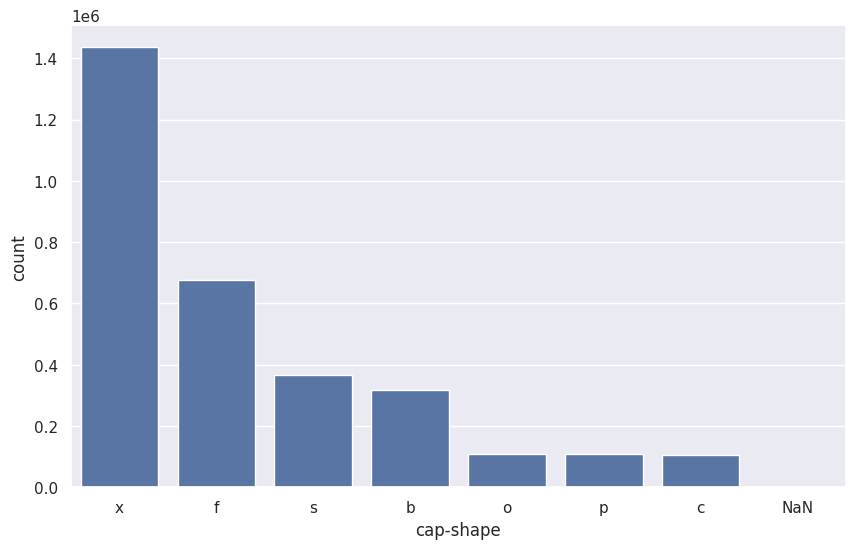

In [ ]:
plt.figure(figsize=(10, 6))

cap_shape_data = df['cap-shape'].fillna('NaN').value_counts(dropna=False).reset_index(name='count')
sns.set_theme()
sns.barplot(x='cap-shape', y='count', data=cap_shape_data)
plt.xlim(-0.5, len(df['cap-shape'].unique()) - 0.5)
plt.plot()

In [ ]:
num_values_clean = dict(zip(categorical_predictors, [df[cat].nunique() for cat in categorical_predictors]))

<Axes: xlabel='Variable', ylabel='Number of Categories'>

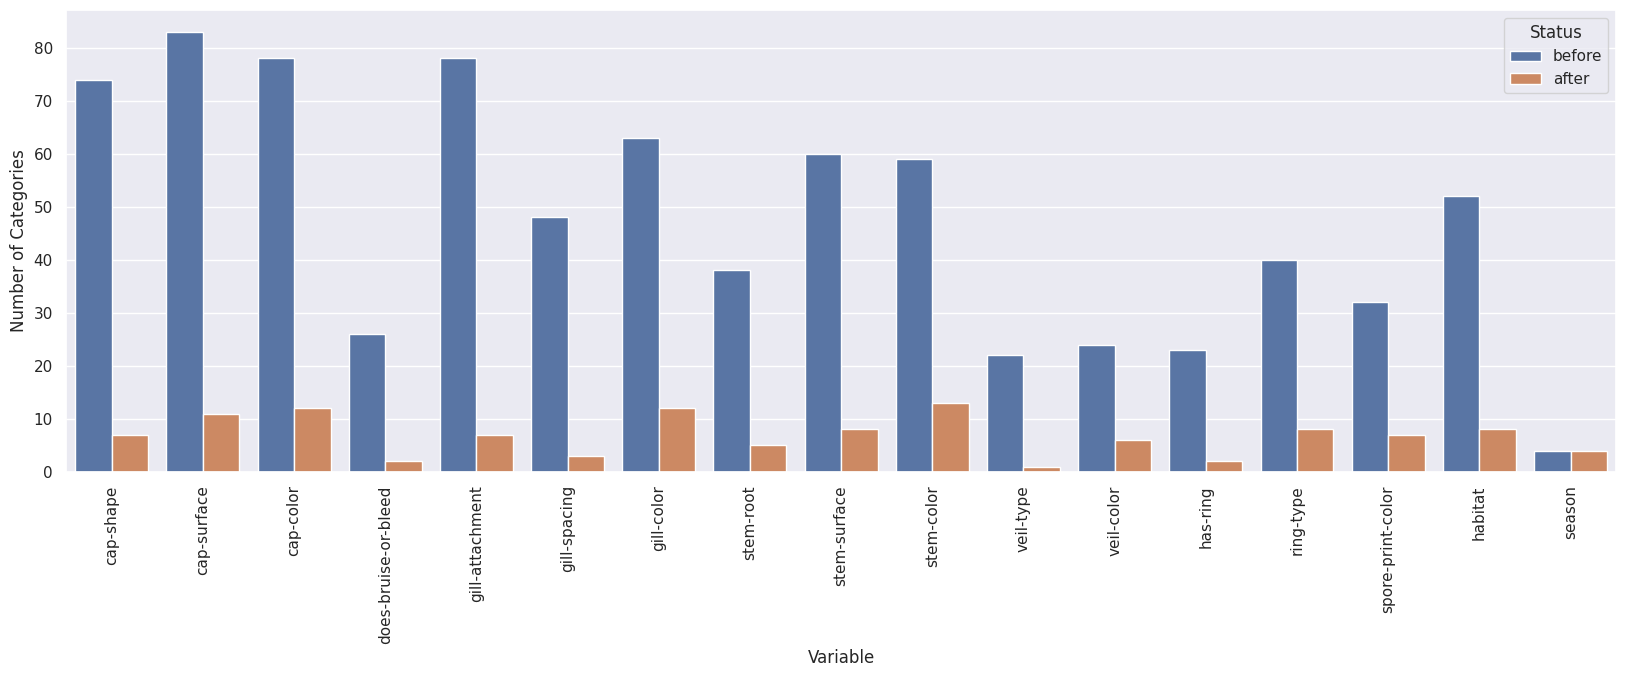

In [ ]:
comp_num_values_df = pd.DataFrame({
    'Variable': categorical_predictors,
    'before': num_values_dirty.values(),
    'after': num_values_clean.values(),
})

plt.figure(figsize=(20, 6))

melted = comp_num_values_df.melt(id_vars='Variable', value_vars=['before', 'after'], var_name='Status', value_name='Number of Categories')

plt.xticks(rotation=90)

sns.barplot(x='Variable', y='Number of Categories', hue='Status', data=melted)

In [ ]:
# Checking to see if there are egregious outliers
df[numerical_predictors].describe()

,cap-diameter,stem-height,stem-width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


<Axes: xlabel='Variable', ylabel='Value'>

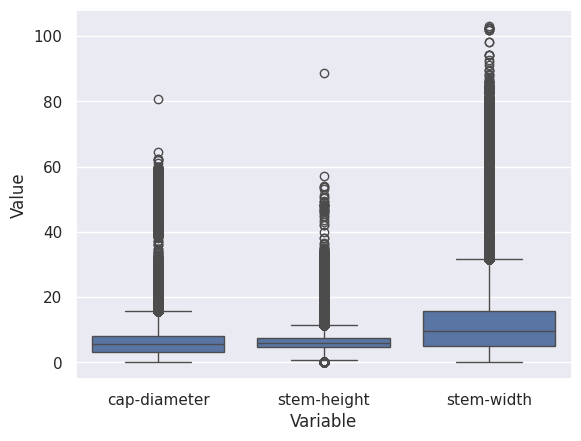

In [ ]:
melted = pd.melt(df[numerical_predictors], var_name='Variable', value_name='Value')
sns.boxplot(x='Variable', y='Value', data=melted)

In [ ]:
# Imputation Step
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer()

df[categorical_predictors] = categorical_imputer.fit_transform(df[categorical_predictors])
df[numerical_predictors] = numerical_imputer.fit_transform(df[numerical_predictors])

df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,b,s,w,u,w,f,f,k,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,b,y,o,u,w,t,z,k,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,b,s,n,u,w,f,f,k,l,w
3,e,3.88,f,y,g,f,s,c,g,4.16,...,b,s,w,u,w,f,f,k,d,u
4,e,5.85,x,l,w,f,d,c,w,3.37,...,b,s,w,u,w,f,f,k,g,a


# Logistic Regression

## No Penalty

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, accuracy_score

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'n_iter']

lr_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        data = df.sample(n=num_rows_training + num_rows_test)
        predictors = data.drop('class', axis=1)
        target = data['class']
        X_train, X_test, y_train, y_test = train_test_split(
            predictors,
            target,
            test_size=num_rows_test,
            shuffle=False
        )
        lr_pipeline = Pipeline([
            ('onehotencoder',ColumnTransformer(
                transformers=[
                    ('categorical', OneHotEncoder(categories=categories, drop='first'), categorical_predictors)
                ],
                remainder='passthrough'
            )),
            ('logistic_regression', LogisticRegression(penalty=None, max_iter=5000))
        ])
        lr_pipeline.fit(X_train, y_train)
        test_prediction = lr_pipeline.predict(X_test)
        mcc = matthews_corrcoef(y_test, test_prediction)
        accuracy = accuracy_score(y_test, test_prediction)

        row = pd.DataFrame({
            'number-sample': [num_rows_training],
            'test-mcc': [mcc],
            'test-accuracy': [accuracy],
            'n_iter': [lr_pipeline.named_steps['logistic_regression'].n_iter_[0]]
        })

        lr_results = pd.concat([lr_results, row])

num-samples:100


<ipython-input-12-6f75d6eb0f4e>:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lr_results = pd.concat([lr_results, row])


num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_lr_results = lr_results.groupby('number-sample').agg({'test-mcc': ['mean', 'std'], 'test-accuracy': ['mean', 'std'], 'n_iter': ['mean']})
agg_lr_results

test-mcc           test-accuracy            n_iter
                   mean       std          mean       std    mean
number-sample                                                    
100            0.331662  0.050867      0.667556  0.025355   49.17
200            0.428042  0.045878      0.716065  0.022637   308.4
300            0.495749  0.038039      0.749773  0.018958  771.85
400            0.552317  0.027236      0.777742  0.013408  713.37
500            0.573534  0.025569      0.788427  0.012505  705.75
1000           0.619955  0.018506      0.811106  0.009092  685.82
2000           0.642101  0.014973      0.821949  0.007374  696.12
5000           0.655916  0.013131      0.828725  0.006482  725.04
10000          0.663159  0.010169      0.832306  0.005063   768.2

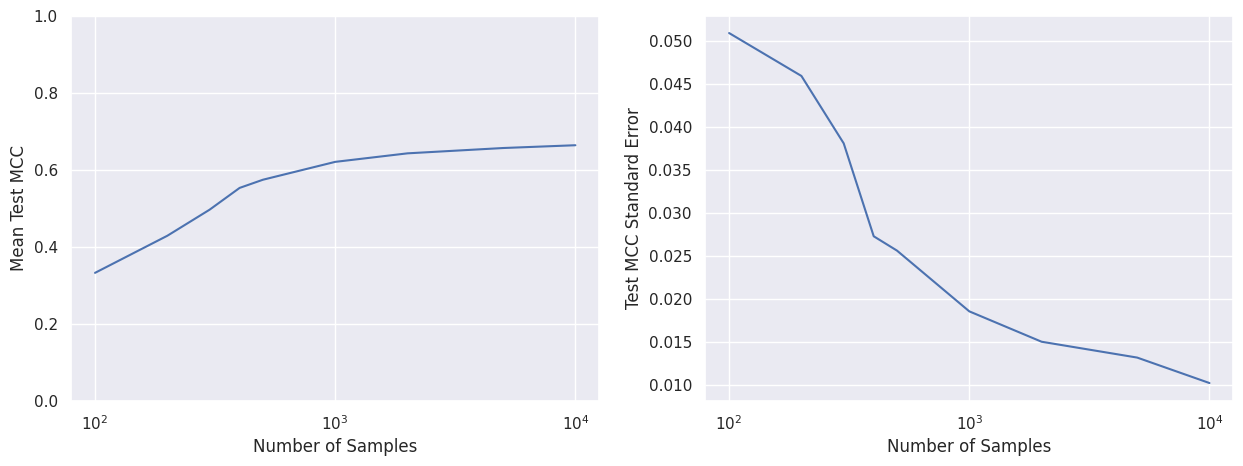

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x=agg_lr_results.index, y=agg_lr_results[('test-mcc', 'mean')], ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Mean Test MCC')
axes[1].set_xscale('log')
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(x=agg_lr_results.index, y=agg_lr_results[('test-mcc', 'std')], ax=axes[1])
plt.show()

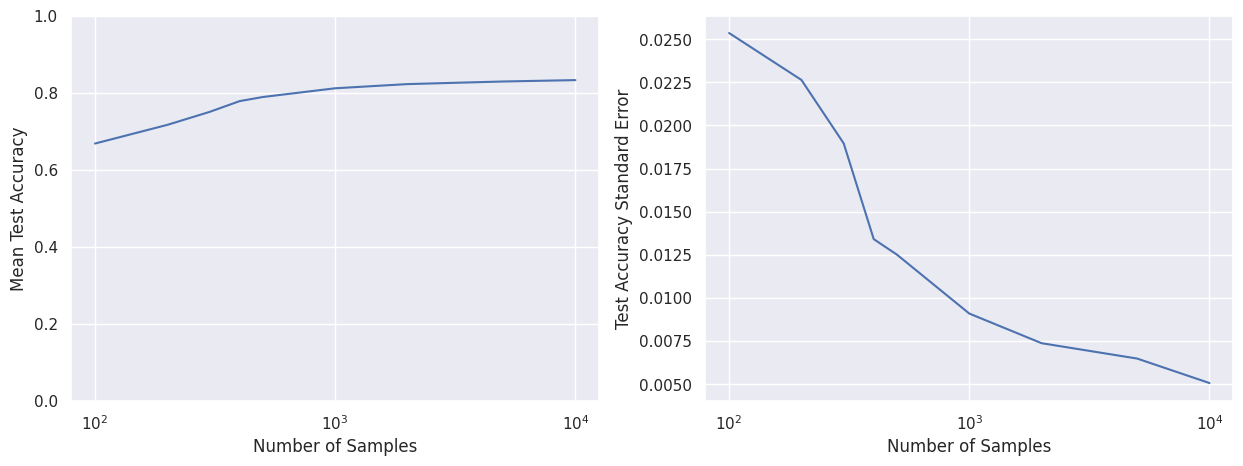

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x=agg_lr_results.index, y=agg_lr_results[('test-accuracy', 'mean')], ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Mean Test Accuracy')
axes[1].set_xscale('log')
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Test Accuracy Standard Error')

sns.lineplot(x=agg_lr_results.index, y=agg_lr_results[('test-accuracy', 'std')], ax=axes[1])
plt.show()

[]

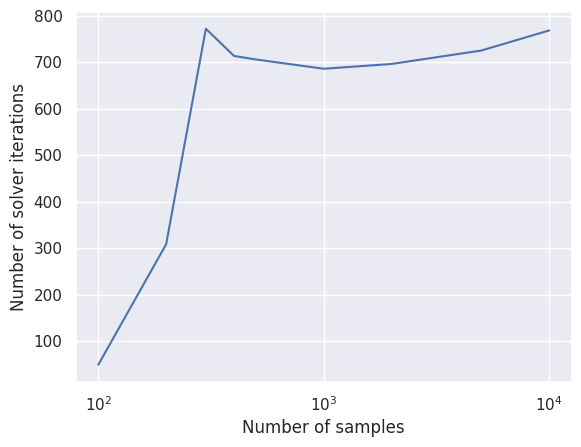

In [ ]:
sns.lineplot(x=agg_lr_results.index, y=agg_lr_results[('n_iter', 'mean')])
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Number of solver iterations')
plt.plot()

## L2 Penalty

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, accuracy_score

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'n_iter', 'C']

regularization_strength = np.logspace(-4, 4, num=10)

l2_lr_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        for reg in regularization_strength:
            data = df.sample(n=num_rows_training + num_rows_test)
            predictors = data.drop('class', axis=1)
            target = data['class']
            X_train, X_test, y_train, y_test = train_test_split(
                predictors,
                target,
                test_size=num_rows_test,
                shuffle=False
            )
            lr_pipeline = Pipeline([
                ('onehotencoder',ColumnTransformer(
                    transformers=[
                        ('categorical', OneHotEncoder(categories=categories, drop='first'), categorical_predictors)
                    ],
                    remainder='passthrough'
                )),
                ('logistic_regression', LogisticRegression(penalty='l2', max_iter=5000, C=reg, solver='liblinear'))
            ])
            lr_pipeline.fit(X_train, y_train)
            test_prediction = lr_pipeline.predict(X_test)
            mcc = matthews_corrcoef(y_test, test_prediction)
            accuracy = accuracy_score(y_test, test_prediction)

            row = pd.DataFrame({
                'number-sample': [num_rows_training],
                'test-mcc': [mcc],
                'test-accuracy': [accuracy],
                'n_iter': [lr_pipeline.named_steps['logistic_regression'].n_iter_[0]],
                'C': [reg]
            })

            l2_lr_results = pd.concat([l2_lr_results, row])

num-samples:100


<ipython-input-19-711a91324b1c>:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l2_lr_results = pd.concat([l2_lr_results, row])


num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
l2_lr_results.head()

,number-sample,test-mcc,test-accuracy,n_iter,C
0,100,0.155033,0.5273,3,0.000100
0,100,0.031541,0.5493,4,0.000774
0,100,0.122453,0.5737,3,0.005995
0,100,0.164962,0.5851,4,0.046416
0,100,0.316531,0.6641,4,0.359381


In [ ]:
agg_l2_lr_results = l2_lr_results.groupby(['C', 'number-sample']).agg({'test-mcc': ['mean', 'std'], 'test-accuracy':['mean', 'std'], 'n_iter': ['mean']}).reset_index()

[]

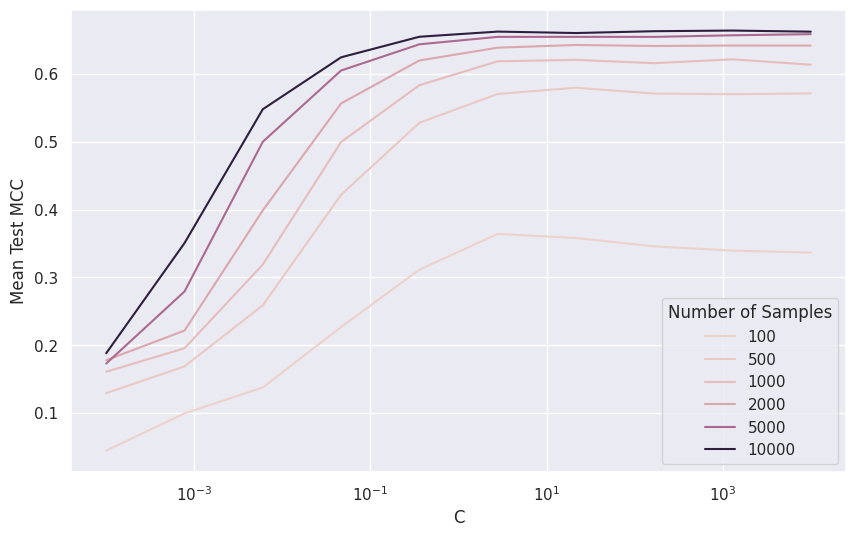

In [ ]:
plt.figure(figsize=(10, 6))
temp_data = agg_l2_lr_results[agg_l2_lr_results['number-sample'].isin([100, 500, 1000, 2000, 5000, 10000])]
sns.lineplot(data=temp_data, x='C', y=('test-mcc', 'mean'), hue='number-sample')
plt.xscale('log')
plt.ylabel('Mean Test MCC')
plt.legend(title="Number of Samples")
plt.plot()

## L1 Penalty

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, accuracy_score

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'n_iter', 'C']

regularization_strength = np.logspace(-4, 4, num=10)

l1_lr_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        for reg in regularization_strength:
            data = df.sample(n=num_rows_training + num_rows_test)
            predictors = data.drop('class', axis=1)
            target = data['class']
            X_train, X_test, y_train, y_test = train_test_split(
                predictors,
                target,
                test_size=num_rows_test,
                shuffle=False
            )
            lr_pipeline = Pipeline([
                ('onehotencoder',ColumnTransformer(
                    transformers=[
                        ('categorical', OneHotEncoder(categories=categories, drop='first'), categorical_predictors)
                    ],
                    remainder='passthrough'
                )),
                ('logistic_regression', LogisticRegression(penalty='l1', max_iter=5000, C=reg, solver='liblinear'))
            ])
            lr_pipeline.fit(X_train, y_train)
            test_prediction = lr_pipeline.predict(X_test)
            mcc = matthews_corrcoef(y_test, test_prediction)
            accuracy = accuracy_score(y_test, test_prediction)

            row = pd.DataFrame({
                'number-sample': [num_rows_training],
                'test-mcc': [mcc],
                'test-accuracy': [accuracy],
                'n_iter': [lr_pipeline.named_steps['logistic_regression'].n_iter_[0]],
                'C': [reg]
            })

            l1_lr_results = pd.concat([l1_lr_results, row])

num-samples:100


<ipython-input-23-319d26761120>:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l1_lr_results = pd.concat([l1_lr_results, row])


num-samples:200


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

num-samples:300


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_l1_lr_results = l1_lr_results.groupby(['C', 'number-sample']).agg({
    'test-mcc': ['mean', 'std'],
    'test-accuracy': ['mean', 'std'],
    'n_iter': ['mean']
}).reset_index()

[]

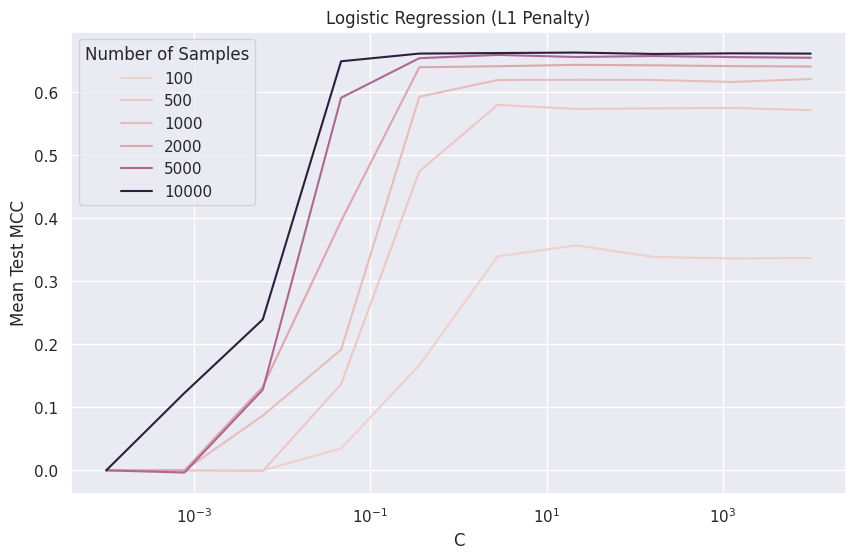

In [ ]:
plt.figure(figsize=(10, 6))
temp_data = agg_l1_lr_results[agg_l2_lr_results['number-sample'].isin([100, 500, 1000, 2000, 5000, 10000])]
sns.lineplot(data=temp_data, x='C', y=('test-mcc', 'mean'), hue='number-sample')
plt.xscale('log')
plt.ylabel('Mean Test MCC')
plt.legend(title="Number of Samples")
plt.title("Logistic Regression (L1 Penalty)")
plt.plot()

## Comparisons of the different penalties

In [ ]:
lr_l1_10k = agg_l1_lr_results[agg_l1_lr_results['number-sample'] == 10000]
lr_l1_best_C = lr_l1_10k.C[lr_l1_10k[('test-mcc', 'mean')].idxmax()]
print(f'The best value for C with L1 penalty is {lr_l1_best_C}.')

lr_l2_10k = agg_l2_lr_results[agg_l2_lr_results['number-sample'] == 10000]
lr_l2_best_C = lr_l2_10k.C[lr_l2_10k[('test-mcc', 'mean')].idxmax()]
print(f'The best value for C with L2 penalty is {lr_l2_best_C:.2f}.')

The best value for C with L1 penalty is 21.54434690031882.
The best value for C with L2 penalty is 1291.55.


In [ ]:
best_l1 = agg_l1_lr_results[agg_l1_lr_results.C == lr_l1_best_C]\
    .reset_index(drop=True)\
    .drop('C', axis=1)

best_l1['method'] = 'L1 Penalty'

best_l2 = agg_l2_lr_results[agg_l2_lr_results.C == lr_l2_best_C]\
    .reset_index(drop=True)\
    .drop('C', axis=1)

best_l2['method'] = 'L2 Penalty'

no_penalty = agg_lr_results.reset_index()[agg_lr_results.reset_index()['number-sample'] <= 10000]
no_penalty['method'] = 'No Penalty'

compare_best_lr = pd.concat([best_l1, best_l2, no_penalty])


<ipython-input-27-a6c17abc0e17>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_l1 = agg_l1_lr_results[agg_l1_lr_results.C == lr_l1_best_C]\
<ipython-input-27-a6c17abc0e17>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_l2 = agg_l2_lr_results[agg_l2_lr_results.C == lr_l2_best_C]\


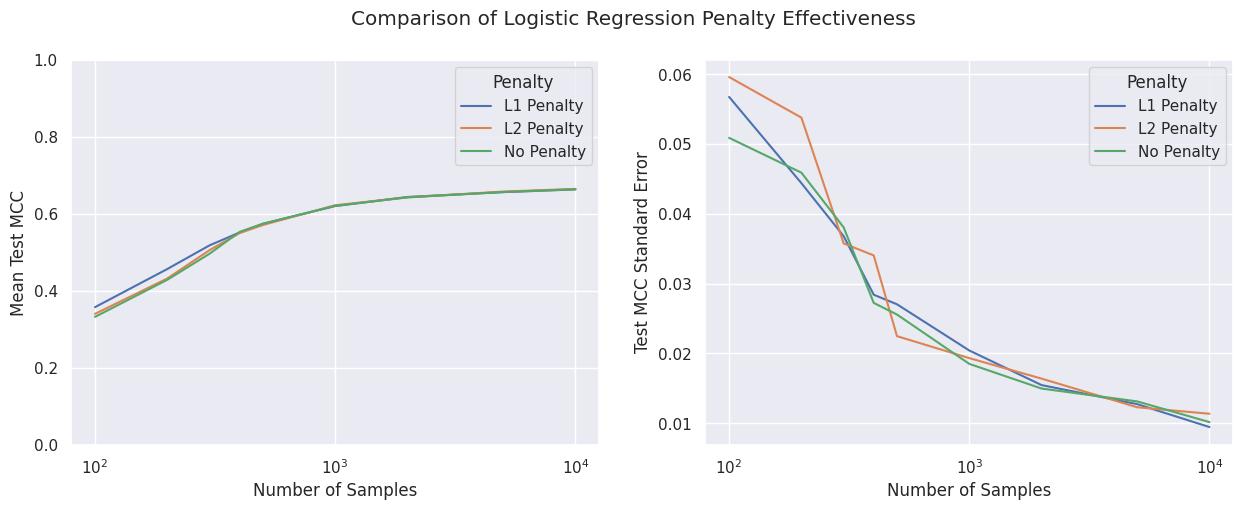

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=compare_best_lr,
    x='number-sample',
    y=('test-mcc', 'mean'),
    hue='method',
    ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Samples')
axes[0].legend(title='Penalty')
axes[0].set_ylabel('Mean Test MCC')

axes[1].set_xscale('log')
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(
    data=compare_best_lr,
    x='number-sample',
    y=('test-mcc', 'std'),
    hue='method',
    ax=axes[1])

axes[1].legend(title='Penalty')

plt.suptitle("Comparison of Logistic Regression Penalty Effectiveness")
plt.show()

# Discriminant Analysis

## Linear Discriminant Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy']

lda_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        data = df.sample(n=num_rows_training + num_rows_test)
        predictors = data.drop('class', axis=1)
        target = data['class']
        X_train, X_test, y_train, y_test = train_test_split(
            predictors,
            target,
            test_size=num_rows_test,
            shuffle=False
        )
        lda_pipeline = Pipeline([
            ('onehotencoder',ColumnTransformer(
                transformers=[
                    ('categorical',
                     OneHotEncoder(
                        categories=categories,
                        drop='first',
                        sparse_output=False, # LDA does not work with a sparse matrix type
                    ),
                     categorical_predictors)
                ],
                remainder='passthrough'
            )),
            ('lda', LinearDiscriminantAnalysis()),
        ])
        lda_pipeline.fit(X_train, y_train)
        test_prediction = lda_pipeline.predict(X_test)
        mcc = matthews_corrcoef(y_test, test_prediction)
        accuracy = accuracy_score(y_test, test_prediction)

        row = pd.DataFrame({
            'number-sample': [num_rows_training],
            'test-mcc': [mcc],
            'test-accuracy': [accuracy],
        })

        lda_results = pd.concat([lda_results, row])

num-samples:100


<ipython-input-30-3bbcbf563db0>:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lda_results = pd.concat([lda_results, row])


num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_results_lda = lda_results.groupby('number-sample').agg({'test-mcc': ['mean', 'std'], 'test-accuracy': ['mean', 'std']}).reset_index()

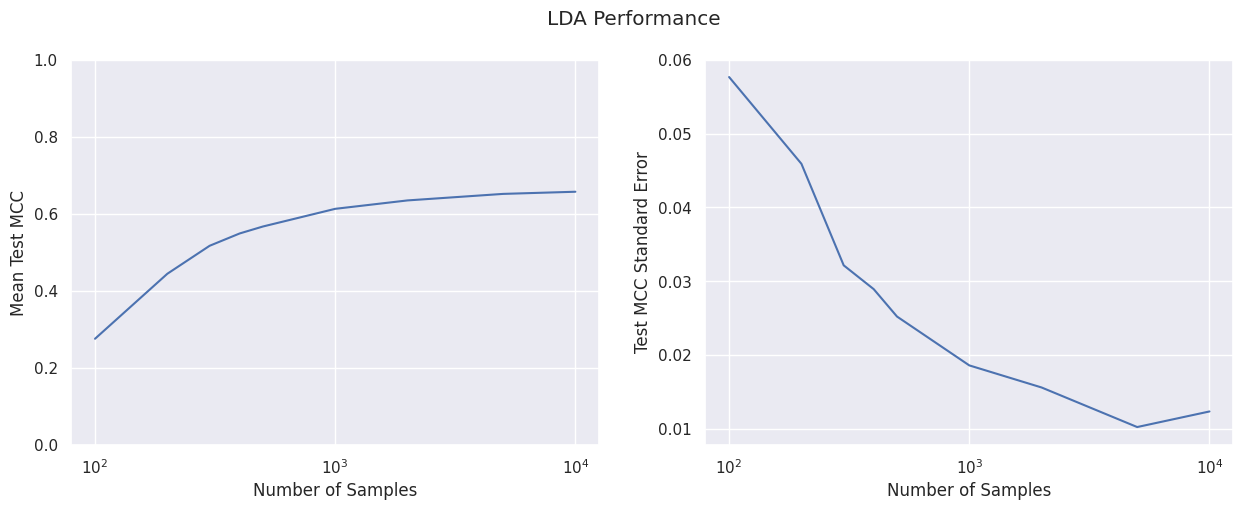

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=agg_results_lda,
    x='number-sample',
    y=('test-mcc', 'mean'),
    ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Mean Test MCC')

axes[1].set_xscale('log')
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(
    data=agg_results_lda,
    x='number-sample',
    y=('test-mcc', 'std'),
    ax=axes[1])

plt.suptitle("LDA Performance")
plt.show()

## Quadratic Discriminant Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

import warnings

# ideally i'd want to count them and log them, but this'll do for now
warnings.filterwarnings('ignore')

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

n_components_values = [20, 40, 50, 60, 65, 70, 75, 80, None]

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'number-components']

qda_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        for n_components in n_components_values:
            data = df.sample(n=num_rows_training + num_rows_test)
            predictors = data.drop('class', axis=1)
            target = data['class']
            X_train, X_test, y_train, y_test = train_test_split(
                predictors,
                target,
                test_size=num_rows_test,
                shuffle=False
            )
            qda_pipeline = Pipeline([
                ('onehotencoder',ColumnTransformer(
                    transformers=[
                        ('categorical',
                        OneHotEncoder(
                            categories=categories,
                            drop='first',
                            sparse_output=False, # LDA does not work with a sparse matrix type
                        ),
                        categorical_predictors)
                    ],
                    remainder='passthrough'
                )),
                ('pca', PCA(n_components=n_components)),
                ('qda', QuadraticDiscriminantAnalysis()),
            ])
            qda_pipeline.fit(X_train, y_train)
            test_prediction = qda_pipeline.predict(X_test)
            mcc = matthews_corrcoef(y_test, test_prediction)
            accuracy = accuracy_score(y_test, test_prediction)

            row = pd.DataFrame({
                'number-sample': [num_rows_training],
                'test-mcc': [mcc],
                'test-accuracy': [accuracy],
                'number-components': [len(qda_pipeline.named_steps['pca'].get_feature_names_out())],
            })

            qda_results = pd.concat([qda_results, row])

num-samples:100
num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_qda_results = qda_results.groupby(['number-sample', 'number-components']).agg({
    'test-mcc': ['mean', 'std'],
    'test-accuracy': ['mean', 'std'],
}).reset_index()
agg_qda_results.tail()

number-sample number-components  test-mcc           test-accuracy          
                                        mean       std          mean       std
76         10000                65  0.815881  0.010843      0.907139  0.005447
77         10000                70  0.817950  0.010041      0.907538  0.005273
78         10000                75  0.816501  0.008668      0.905501  0.004755
79         10000                80  0.779131  0.018655      0.882231  0.011254
80         10000               102  0.351027  0.032239      0.586252  0.021756

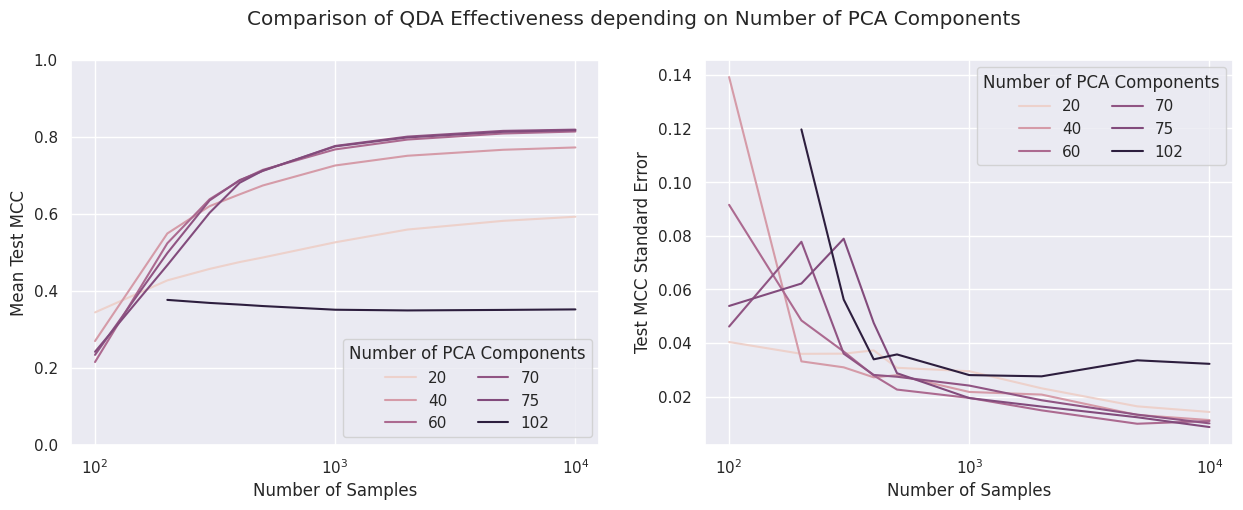

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=agg_qda_results[agg_qda_results['number-components'].isin([20, 40, 60, 70, 75, 102])],
    x='number-sample',
    y=('test-mcc', 'mean'),
    hue='number-components',
    ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Samples')
axes[0].legend(title='Number of PCA Components', ncol=2)
axes[0].set_ylabel('Mean Test MCC')

axes[1].set_xscale('log')
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(
    data=agg_qda_results[agg_qda_results['number-components'].isin([20, 40, 60, 70, 75, 102])],
    x='number-sample',
    y=('test-mcc', 'std'),
    hue='number-components',
    ax=axes[1])

axes[1].legend(title='Number of PCA Components', ncol=2)

plt.suptitle("Comparison of QDA Effectiveness depending on Number of PCA Components")
plt.show()

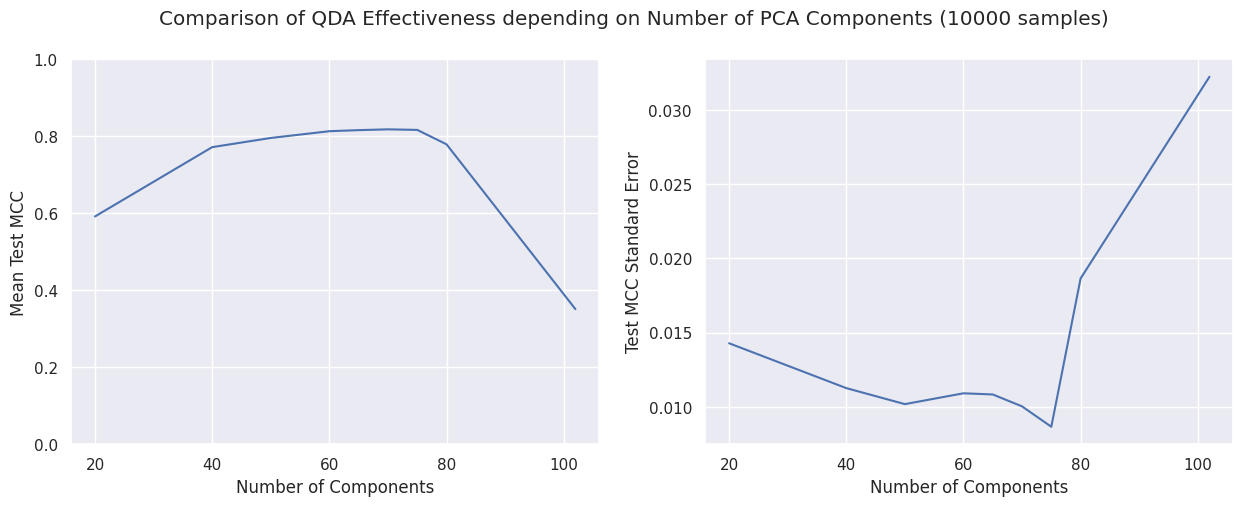

In [ ]:
temp_data = agg_qda_results[agg_qda_results['number-sample'] == 10000]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=temp_data,
    x='number-components',
    y=('test-mcc', 'mean'),
    ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Mean Test MCC')

axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(
    data=temp_data,
    x='number-components',
    y=('test-mcc', 'std'),
    ax=axes[1])

plt.suptitle("Comparison of QDA Effectiveness depending on Number of PCA Components (10000 samples)")
plt.show()

# Tree-based Methods

## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.tree import DecisionTreeClassifier

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

ccp_alpha_values = np.logspace(-7, 1, num=10)

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'alpha', 'node_count', 'leaf_count']

decision_tree_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        for alpha in ccp_alpha_values:
            data = df.sample(n=num_rows_training + num_rows_test)
            predictors = data.drop('class', axis=1)
            target = data['class']
            X_train, X_test, y_train, y_test = train_test_split(
                predictors,
                target,
                test_size=num_rows_test,
                shuffle=False
            )
            decision_tree_pipeline = Pipeline([
                # even if theoretically it could be possible to make a decision tree
                # classifier without one hot encoding, it doesn't work like this here
                ('onehotencoder',ColumnTransformer(
                    transformers=[
                        ('categorical',
                        OneHotEncoder(
                            categories=categories,
                            drop='first',
                        ),
                        categorical_predictors)
                    ],
                    remainder='passthrough'
                )),
                ('tree', DecisionTreeClassifier(ccp_alpha=alpha))
            ])
            decision_tree_pipeline.fit(X_train, y_train)
            test_prediction = decision_tree_pipeline.predict(X_test)
            mcc = matthews_corrcoef(y_test, test_prediction)
            accuracy = accuracy_score(y_test, test_prediction)

            row = pd.DataFrame({
                'number-sample': [num_rows_training],
                'test-mcc': [mcc],
                'test-accuracy': [accuracy],
                'alpha': [alpha],
                'node-count': decision_tree_pipeline.named_steps['tree'].tree_.node_count,
                'leaf-count': decision_tree_pipeline.named_steps['tree'].tree_.n_leaves,
            })

            decision_tree_results = pd.concat([decision_tree_results, row])

num-samples:100


<ipython-input-12-b7120640fcb8>:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  decision_tree_results = pd.concat([decision_tree_results, row])


num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_decision_tree_results = decision_tree_results.groupby(['number-sample', 'alpha']).agg({
    'test-mcc': ['mean', 'std'],
    'test-accuracy': ['mean', 'std'],
    'node-count': ['mean'],
    'leaf-count': ['mean']
}).reset_index()
agg_decision_tree_results.head()

number-sample         alpha  test-mcc           test-accuracy            \
                                   mean       std          mean       std   
0           100  1.000000e-07  0.302187  0.063929      0.652551  0.032173   
1           100  7.742637e-07  0.292810  0.064250      0.648362  0.031063   
2           100  5.994843e-06  0.313437  0.061853      0.658156  0.029870   
3           100  4.641589e-05  0.293678  0.061778      0.648453  0.030826   
4           100  3.593814e-04  0.300767  0.056950      0.651407  0.028306   

  node-count leaf-count  
        mean       mean  
0      44.16      22.58  
1      44.66      22.83  
2      43.62      22.31  
3      43.68      22.34  
4      43.72      22.36

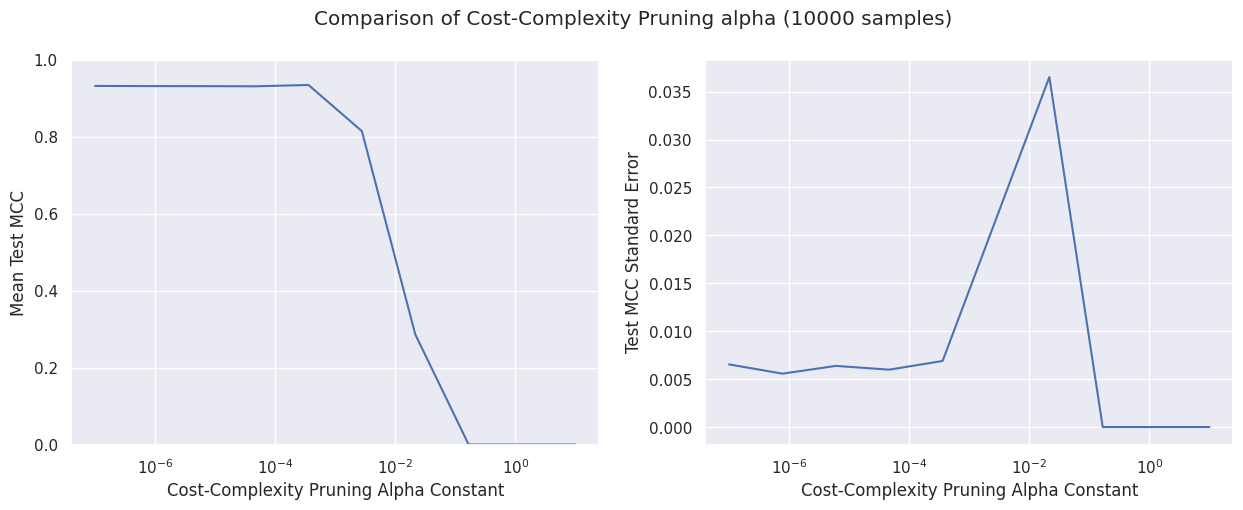

In [ ]:
import seaborn as sns

temp_data = agg_decision_tree_results[agg_decision_tree_results['number-sample'] == 10000]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=temp_data,
    x='alpha',
    y=('test-mcc', 'mean'),
    ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Cost-Complexity Pruning Alpha Constant')
axes[0].set_xscale('log')
axes[0].set_ylabel('Mean Test MCC')

axes[1].set_xlabel('Cost-Complexity Pruning Alpha Constant')
axes[1].set_ylabel('Test MCC Standard Error')
axes[1].set_xscale('log')

sns.lineplot(
    data=temp_data,
    x='alpha',
    y=('test-mcc', 'std'),
    ax=axes[1])

plt.suptitle("Comparison of Cost-Complexity Pruning alpha (10000 samples)")
plt.show()

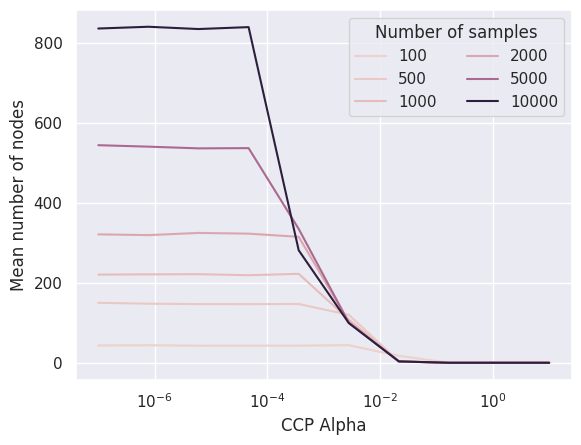

In [ ]:
sns.lineplot(
    data=agg_decision_tree_results[agg_decision_tree_results['number-sample'].isin([100, 500, 1000, 2000, 5000, 10000])],
    x='alpha',
    y=('node-count', 'mean'),
    hue='number-sample',
)

plt.xscale('log')
plt.xlabel('CCP Alpha')
plt.ylabel('Mean number of nodes')
plt.legend(ncol=2, title="Number of samples")
plt.show()

In [ ]:
dt_best_alpha = agg_decision_tree_results['alpha'][agg_decision_tree_results[('test-mcc', 'mean')].idxmax()]
print(f'Best CCP alpha value for DecisionTreeClassifier : {dt_best_alpha}')

Best CCP alpha value for DecisionTreeClassifier : 0.00035938136638046257


## Bagging

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.ensemble import BaggingClassifier

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

num_trees_values = [2, 3, 4, 5, 10, 50]

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'num-trees']

bagging_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        for num_trees in num_trees_values:
            data = df.sample(n=num_rows_training + num_rows_test)
            predictors = data.drop('class', axis=1)
            target = data['class']
            X_train, X_test, y_train, y_test = train_test_split(
                predictors,
                target,
                test_size=num_rows_test,
                shuffle=False
            )
            bagging_pipeline = Pipeline([
                # even if theoretically it could be possible to make a decision tree
                # classifier without one hot encoding, it doesn't work like this here
                ('onehotencoder',ColumnTransformer(
                    transformers=[
                        ('categorical',
                        OneHotEncoder(
                            categories=categories,
                            drop='first',
                        ),
                        categorical_predictors)
                    ],
                    remainder='passthrough'
                )),
                ('bag', BaggingClassifier(n_estimators=num_trees))
            ])
            bagging_pipeline.fit(X_train, y_train)
            test_prediction = bagging_pipeline.predict(X_test)
            mcc = matthews_corrcoef(y_test, test_prediction)
            accuracy = accuracy_score(y_test, test_prediction)

            row = pd.DataFrame({
                'number-sample': [num_rows_training],
                'test-mcc': [mcc],
                'test-accuracy': [accuracy],
                'num-trees': [num_trees]
            })

            bagging_results = pd.concat([bagging_results, row])

num-samples:100


<ipython-input-17-4d3ca2b84790>:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bagging_results = pd.concat([bagging_results, row])


num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_bag_results = bagging_results.groupby(['number-sample', 'num-trees']).agg({
    'test-mcc': ['mean', 'std'],
    'test-accuracy': ['mean', 'std'],
}).reset_index()
agg_bag_results.head()

number-sample num-trees  test-mcc           test-accuracy          
                               mean       std          mean       std
0           100         2  0.245719  0.049973      0.603106  0.026941
1           100         3  0.293317  0.059667      0.647816  0.028414
2           100         4  0.297961  0.061428      0.639232  0.030736
3           100         5  0.322453  0.055497      0.662498  0.026397
4           100        10  0.359182  0.040927      0.676140  0.020179

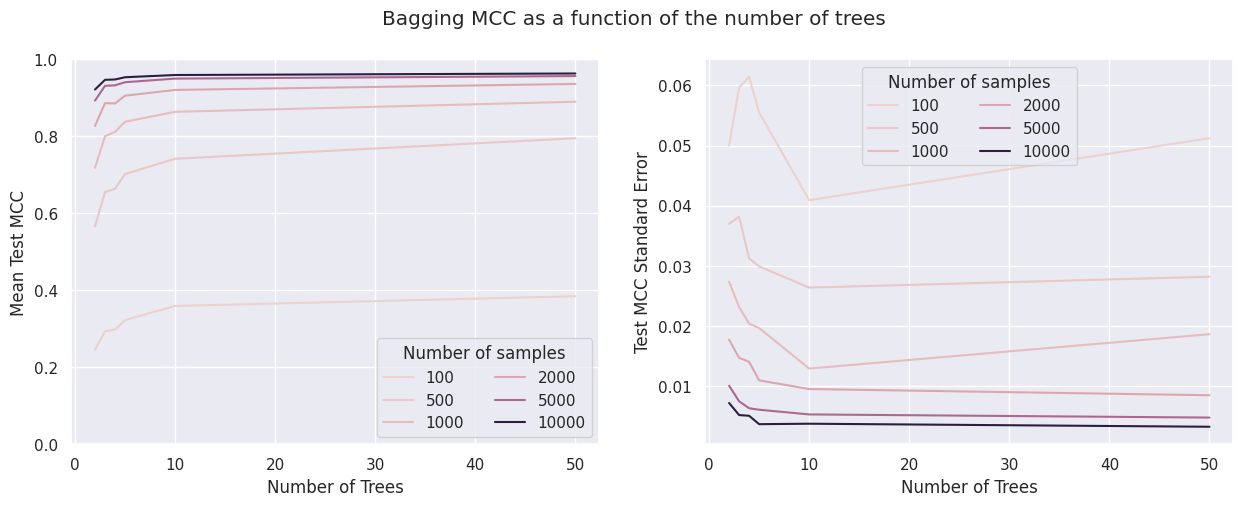

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
temp_data = agg_bag_results[agg_bag_results['number-sample'].isin([100, 500, 1000, 2000, 5000, 10000])]
sns.lineplot(
    data=temp_data,
    x='num-trees',
    y=('test-mcc', 'mean'),
    hue='number-sample',
    ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Trees')
axes[0].set_ylabel('Mean Test MCC')
axes[0].legend(ncol=2, title='Number of samples')

axes[1].set_xlabel('Number of Trees')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(
    data=temp_data,
    x='num-trees',
    y=('test-mcc', 'std'),
    hue='number-sample',
    ax=axes[1])

axes[1].legend(ncol=2, title='Number of samples')
plt.suptitle("Bagging MCC as a function of the number of trees")
plt.show()

In [ ]:
best_tree_number = agg_bag_results['num-trees'][agg_bag_results[('test-mcc', 'mean')].idxmax()]
print(f'Best Number of Trees : {best_tree_number}')

Best Number of Trees : 50


<ipython-input-21-385cdf9cfb52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dt_ev['method'] = 'Decision Tree'
<ipython-input-21-385cdf9cfb52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_bag_ev['method'] = 'Bagging'


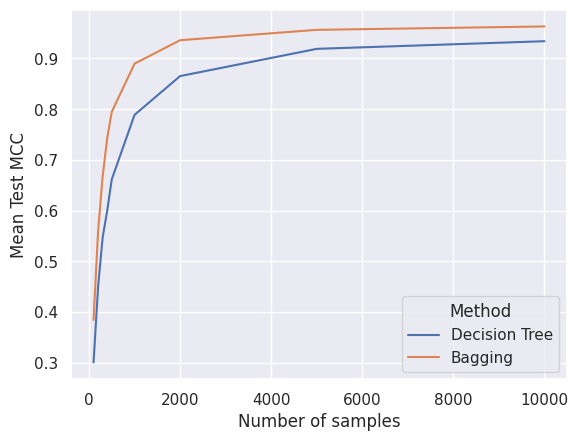

In [ ]:
best_dt_ev = agg_decision_tree_results[agg_decision_tree_results['alpha'] == dt_best_alpha]
best_bag_ev = agg_bag_results[agg_bag_results['num-trees'] == best_tree_number]

best_dt_ev['method'] = 'Decision Tree'
best_bag_ev['method'] = 'Bagging'

temp_df = pd.concat([best_dt_ev, best_bag_ev])

sns.lineplot(
    data=temp_df,
    x='number-sample',
    y=('test-mcc', 'mean'),
    hue='method',
)

plt.xlabel('Number of samples')
plt.ylabel('Mean Test MCC')
plt.legend(title='Method')
plt.show()

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

num_trees_values = [2, 3, 4, 5, 10, 20, 50, 100]

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'num-trees']

rf_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        for num_trees in num_trees_values:
            data = df.sample(n=num_rows_training + num_rows_test)
            predictors = data.drop('class', axis=1)
            target = data['class']
            X_train, X_test, y_train, y_test = train_test_split(
                predictors,
                target,
                test_size=num_rows_test,
                shuffle=False
            )
            rf_pipeline = Pipeline([
                # even if theoretically it could be possible to make a decision tree
                # classifier without one hot encoding, it doesn't work like this here
                ('onehotencoder',ColumnTransformer(
                    transformers=[
                        ('categorical',
                        OneHotEncoder(
                            categories=categories,
                            drop='first',
                        ),
                        categorical_predictors)
                    ],
                    remainder='passthrough'
                )),
                ('random-forest', RandomForestClassifier(n_estimators=num_trees))
            ])
            rf_pipeline.fit(X_train, y_train)
            test_prediction = rf_pipeline.predict(X_test)
            mcc = matthews_corrcoef(y_test, test_prediction)
            accuracy = accuracy_score(y_test, test_prediction)

            row = pd.DataFrame({
                'number-sample': [num_rows_training],
                'test-mcc': [mcc],
                'test-accuracy': [accuracy],
                'num-trees': [num_trees]
            })

            rf_results = pd.concat([rf_results, row])

num-samples:100


<ipython-input-22-4a72d2bee671>:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rf_results = pd.concat([rf_results, row])


num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_rf_results = rf_results.groupby(['number-sample', 'num-trees']).agg({
    'test-mcc': ['mean', 'std'],
    'test-accuracy': ['mean', 'std'],
}).reset_index()
agg_rf_results.tail()

number-sample num-trees  test-mcc           test-accuracy          
                                mean       std          mean       std
67         10000         5  0.959367  0.003760      0.979853  0.001864
68         10000        10  0.968996  0.002426      0.984605  0.001210
69         10000        20  0.973684  0.002350      0.986940  0.001167
70         10000        50  0.976536  0.002291      0.988364  0.001130
71         10000       100  0.977138  0.002143      0.988660  0.001067

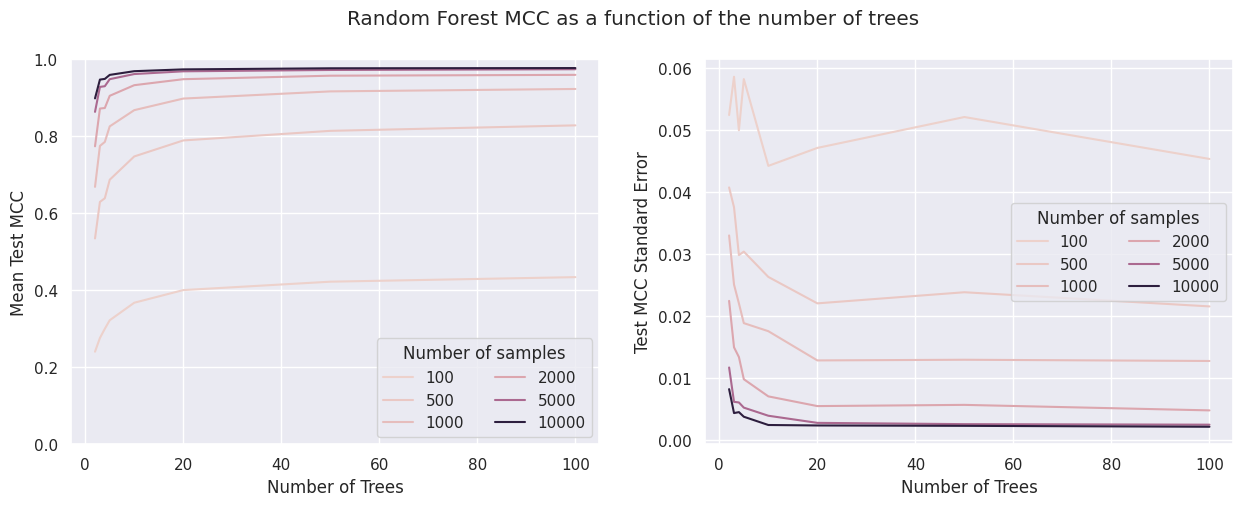

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
temp_data = agg_rf_results[agg_rf_results['number-sample'].isin([100, 500, 1000, 2000, 5000, 10000])]
sns.lineplot(
    data=temp_data,
    x='num-trees',
    y=('test-mcc', 'mean'),
    hue='number-sample',
    ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Trees')
axes[0].set_ylabel('Mean Test MCC')
axes[0].legend(ncol=2, title='Number of samples')

axes[1].set_xlabel('Number of Trees')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(
    data=temp_data,
    x='num-trees',
    y=('test-mcc', 'std'),
    hue='number-sample',
    ax=axes[1])

axes[1].legend(ncol=2, title='Number of samples')
plt.suptitle("Random Forest MCC as a function of the number of trees")
plt.show()

In [ ]:
rf10k = agg_rf_results[agg_rf_results['number-sample'] == 10000]
best_rf_num_tree = rf10k['num-trees'][rf10k[('test-mcc', 'mean')].idxmax()]
print(f'Best amount of trees for random forest: {best_rf_num_tree}')

Best amount of trees for random forest: 100


## Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

num_rows_training_vals = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
num_rows_test = 10000
N = 100

learning_rates_values = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]

# we need to precompute these as we'll train with only part of the data,
# we can't ensure that we see all the labels
categories = [
    df[col].unique() for col in categorical_predictors
]

result_columns = ['number-sample', 'test-mcc', 'test-accuracy', 'learning-rate']

boosting_results = pd.DataFrame(columns=result_columns)

for num_rows_training in num_rows_training_vals:
    print(f'num-samples:{num_rows_training}')
    for _ in range(N):
        for learning_rate in learning_rates_values:
            data = df.sample(n=num_rows_training + num_rows_test)
            predictors = data.drop('class', axis=1)
            target = data['class']
            X_train, X_test, y_train, y_test = train_test_split(
                predictors,
                target,
                test_size=num_rows_test,
                shuffle=False
            )
            boosting_pipeline = Pipeline([
                # even if theoretically it could be possible to make a decision tree
                # classifier without one hot encoding, it doesn't work like this here
                ('onehotencoder',ColumnTransformer(
                    transformers=[
                        ('categorical',
                        OneHotEncoder(
                            categories=categories,
                            drop='first',
                        ),
                        categorical_predictors)
                    ],
                    remainder='passthrough'
                )),
                ('boosting', GradientBoostingClassifier(learning_rate=learning_rate))
            ])
            boosting_pipeline.fit(X_train, y_train)
            test_prediction = boosting_pipeline.predict(X_test)
            mcc = matthews_corrcoef(y_test, test_prediction)
            accuracy = accuracy_score(y_test, test_prediction)

            row = pd.DataFrame({
                'number-sample': [num_rows_training],
                'test-mcc': [mcc],
                'test-accuracy': [accuracy],
                'learning-rate': [learning_rate],
            })

            boosting_results = pd.concat([boosting_results, row])

num-samples:100


<ipython-input-26-8ab922e5e0b0>:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  boosting_results = pd.concat([boosting_results, row])


num-samples:200
num-samples:300
num-samples:400
num-samples:500
num-samples:1000
num-samples:2000
num-samples:5000
num-samples:10000


In [ ]:
agg_boosting_results = boosting_results.groupby(['number-sample', 'learning-rate']).agg({
    'test-mcc': ['mean', 'std'],
    'test-accuracy': ['mean', 'std'],
}).reset_index()
agg_boosting_results.tail()

number-sample learning-rate  test-mcc           test-accuracy          
                                    mean       std          mean       std
67         10000           0.8  0.956108  0.004009      0.978220  0.001990
68         10000           1.0  0.954820  0.003478      0.977590  0.001729
69         10000           1.2  0.948778  0.005134      0.974595  0.002558
70         10000           1.4  0.942136  0.006352      0.971297  0.003171
71         10000           1.6  0.931393  0.019580      0.965903  0.010174

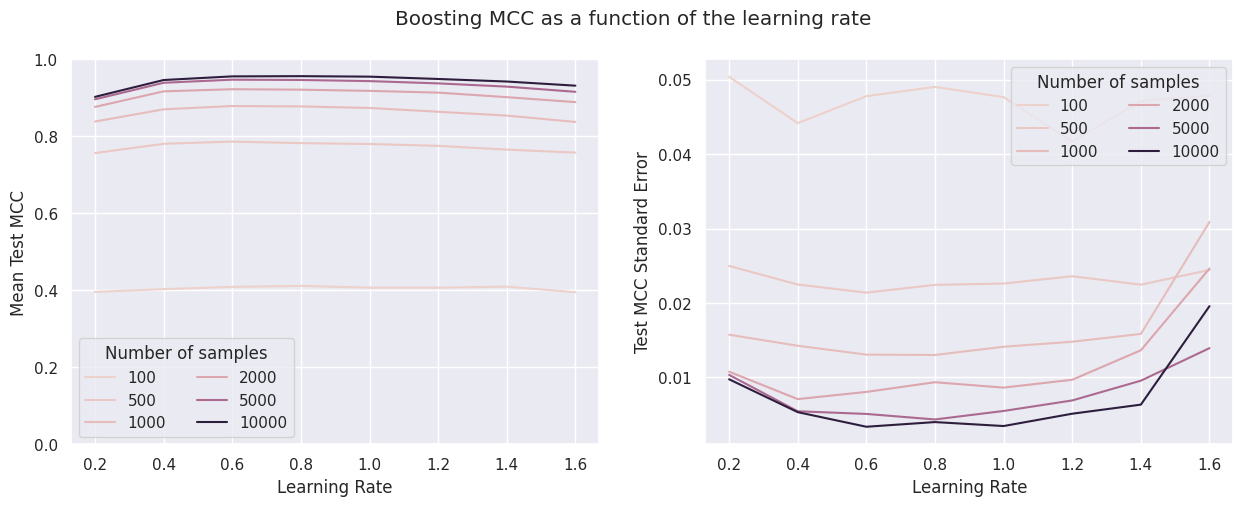

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
temp_data = agg_boosting_results[
    (agg_boosting_results['number-sample'].isin([100, 500, 1000, 2000, 5000, 10000]))
    ]
sns.lineplot(
    data=temp_data,
    x='learning-rate',
    y=('test-mcc', 'mean'),
    hue='number-sample',
    ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Mean Test MCC')
axes[0].legend(ncol=2, title='Number of samples')

axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Test MCC Standard Error')

sns.lineplot(
    data=temp_data,
    x='learning-rate',
    y=('test-mcc', 'std'),
    hue='number-sample',
    ax=axes[1])

axes[1].legend(ncol=2, title='Number of samples')
plt.suptitle("Boosting MCC as a function of the learning rate")
plt.show()

In [ ]:
boosting10k = agg_boosting_results[agg_boosting_results['number-sample'] == 10000].reset_index()
best_boosting_learning_rate = boosting10k['learning-rate'][boosting10k[('test-mcc', 'mean')].idxmax()]
best_boosting_learning_rate

0.8

<ipython-input-30-1fc2f8f37ece>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dt_ev['method'] = 'Decision Tree'
<ipython-input-30-1fc2f8f37ece>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_bag_ev['method'] = 'Bagging'
<ipython-input-30-1fc2f8f37ece>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

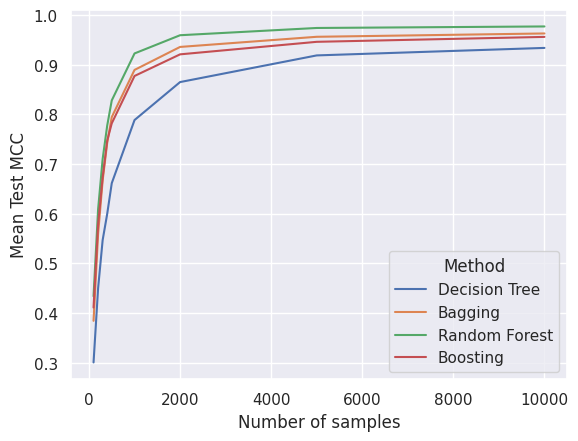

In [ ]:
best_dt_ev = agg_decision_tree_results[agg_decision_tree_results['alpha'] == dt_best_alpha]
best_bag_ev = agg_bag_results[agg_bag_results['num-trees'] == best_tree_number]
best_rf_ev = agg_rf_results[agg_rf_results['num-trees'] == best_rf_num_tree]
best_boosting_ev = agg_boosting_results[agg_boosting_results['learning-rate'] == best_boosting_learning_rate]

best_dt_ev['method'] = 'Decision Tree'
best_bag_ev['method'] = 'Bagging'
best_rf_ev['method'] = 'Random Forest'
best_boosting_ev['method'] = 'Boosting'
temp_df = pd.concat([best_dt_ev, best_bag_ev, best_rf_ev, best_boosting_ev])

sns.lineplot(
    data=temp_df,
    x='number-sample',
    y=('test-mcc', 'mean'),
    hue='method',
)

plt.xlabel('Number of samples')
plt.ylabel('Mean Test MCC')
plt.legend(title='Method')
plt.show()